<a href="https://colab.research.google.com/github/Gyuseo-stack/Statistics_DGS/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [6]:
hotel_data = pd.read_csv('/content/sample_data/hotel_bookings.csv')

In [7]:
hotel_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [8]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## EDA와 Feature Engineering

데이터의 전반적인 분포를 살펴보고, 목표 변수와의 통계적 관계를 시각화해 이해도를 높이는 작업을 진행
이를 통해 데이터 전반의 특징 파악, 극단값(이상치) 탐지, 명백한 오류 식별이 가능하다.

첫 번째 그래프는 **호텔 유형**을 탐색한 결과를 보여준다.

그래프에 따르면 전체 예약 중 약 34%가 리조트 호텔, 나머지 약 66%가 시티 호텔에서 예약된 것으로 나타났다

/tmp/ipython-input-3877009777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hotel', data = hotel_data, palette='gist_earth')


Text(0, 0.5, 'Count')

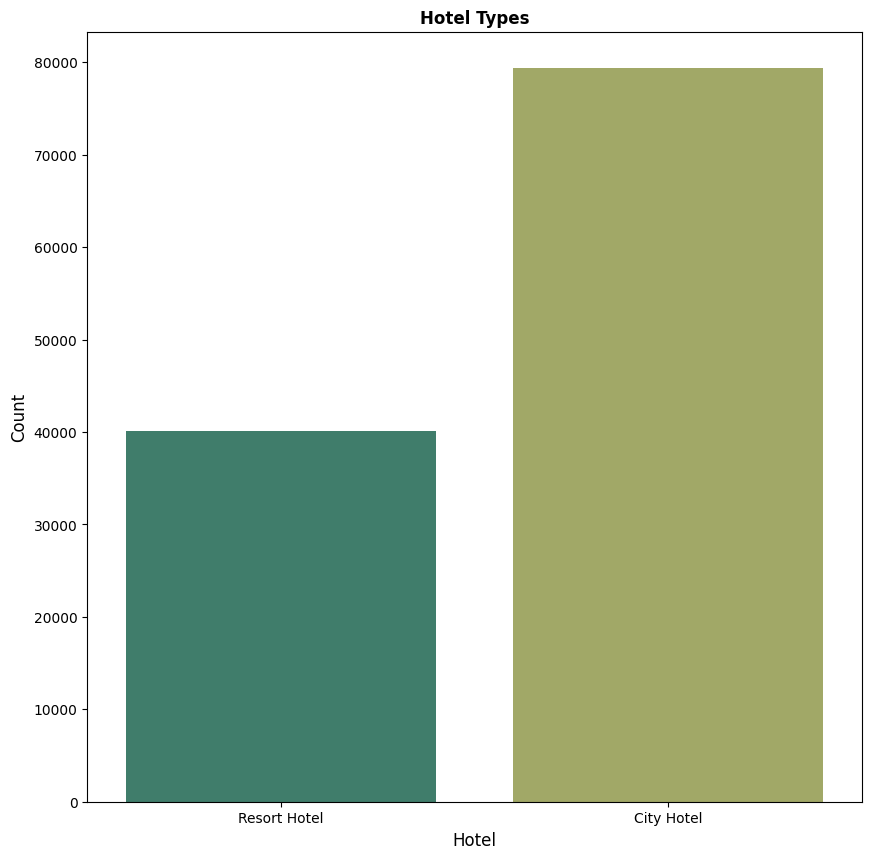

In [9]:
# Hotel types details

plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = hotel_data, palette='gist_earth')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

### 타깃 변수 분석 요약
예약 취소율: 약 37%

예약 유지율: 약 63%

두 비율이 크게 차이나지 않아 클래스 불균형 문제는 거의 없음

/tmp/ipython-input-3795245566.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='is_canceled', data= hotel_data, palette='gist_stern', orient = 'v')


Text(0, 0.5, 'Canceled or Not Canceled')

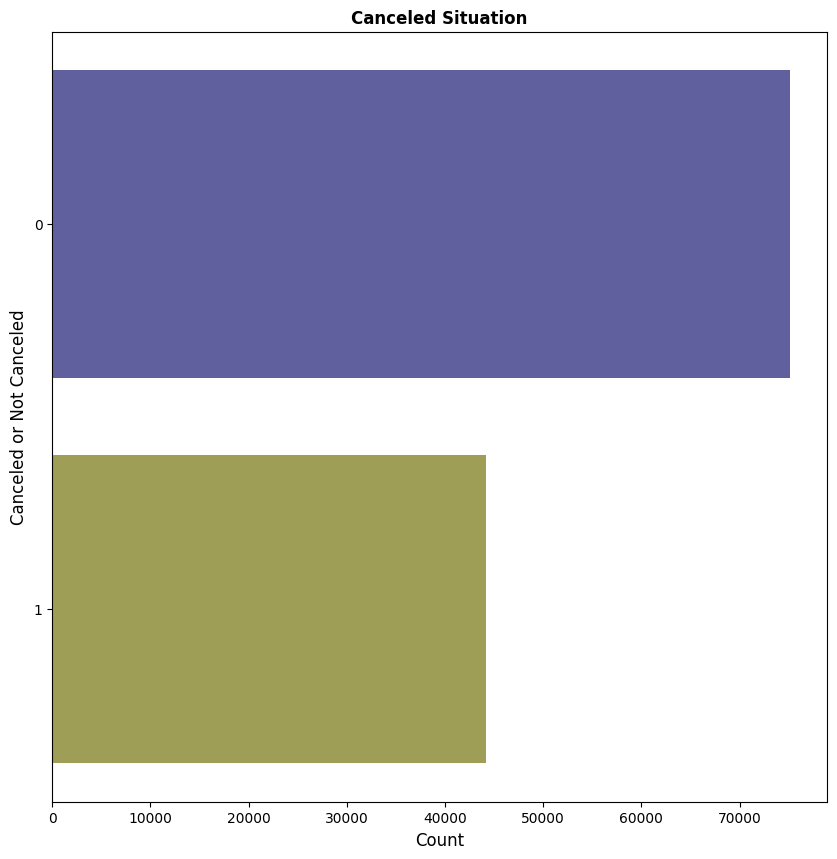

In [10]:
# `is_canceled` graph

plt.figure(figsize=(10,10))
sns.countplot(y='is_canceled', data= hotel_data, palette='gist_stern', orient = 'v')
plt.title('Canceled Situation', weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Canceled or Not Canceled', fontsize=12)

## Violin Plot 분석 요약

### 그래프 개요
- **분석 대상**: `arrival_date_year`(도착 연도)와 `lead_time`(예약 후 도착까지 일수)의 관계  
- **구분 기준**: 예약 **취소 여부(canceled / not-canceled)**  

---

### 취소된 예약 (Canceled)
- **평균**과 **사분위 범위(IQR)** 는 **연도별로 큰 차이가 없음**  
- 하지만 **분포의 형태는 연도마다 뚜렷하게 다름**

---

### 취소되지 않은 예약 (Not-Canceled)
- **연도별 분포가 거의 동일**  
- 안정적인 분포 형태를 유지

---

### 전체 공통 인사이트
- 모든 연도와 예약 상태에서 **일부 매우 큰 `lead_time` 값**이 존재  
- 이로 인해 **평균(Mean)이 중앙값(Median)보다 높게 나타남**

/tmp/ipython-input-2557803467.py:4: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=hotel_data, palette="Set3", bw=.2,


Text(0, 0.5, 'Lead Time')

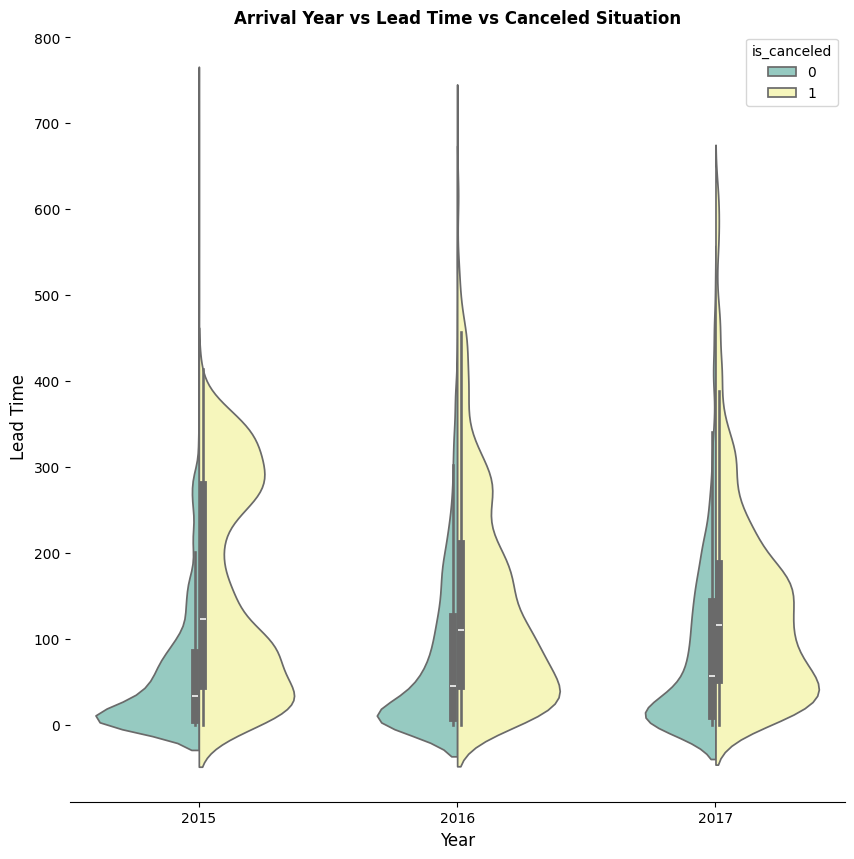

In [15]:
# `arrival_date_year` vs `lead_time` vs `is_canceled` exploration with violin plot

plt.figure(figsize=(10,10))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=hotel_data, palette="Set3", bw=.2,
               cut=2, split = True)
sns.despine(left=True)
plt.title('Arrival Year vs Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

### arrival_date_month 분석 요약
- **월 이름을 숫자로 변환**하여 `arrival_date_month` 특성을 분석  
- 숫자 변환을 통해 **월별 비교와 통계 분석을 보다 쉽게 수행**할 수 있도록 전처리함

In [16]:
#`arrival_date_month` names converted to the numbers

hotel_data['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9',
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

/tmp/ipython-input-2456198075.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_data['arrival_date_month'].replace({'January' : '1',


/tmp/ipython-input-3972968644.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  order=pd.value_counts(hotel_data['arrival_date_month']).index, palette='YlOrBr_r')
/tmp/ipython-input-3972968644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='arrival_date_month', data = hotel_data,


Text(0, 0.5, 'Count')

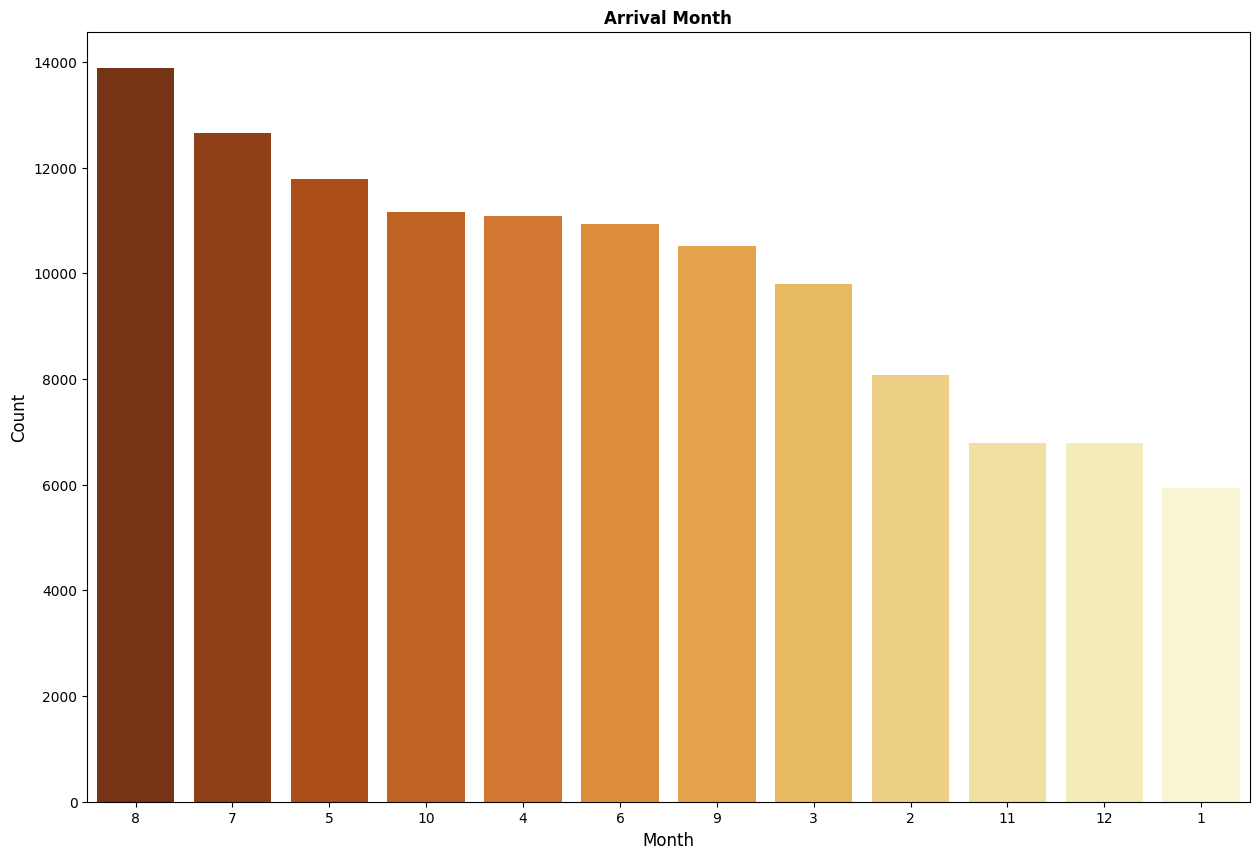

In [17]:
#`arrival_date_month` exploration

plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = hotel_data,
              order=pd.value_counts(hotel_data['arrival_date_month']).index, palette='YlOrBr_r')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)

### 월별 예약 및 숙박 데이터 요약

- **월별 예약 건수**  
  - **8월(August)**: 가장 예약이 많은 달  
  - **1월(January)**: 가장 예약이 적은 달로, 8월의 절반 수준


In [18]:
# Table of `stay_in_weekend` and `stay_in_week_nights` features

pd.crosstab(index = hotel_data['stays_in_week_nights'],columns=hotel_data['stays_in_weekend_nights'], margins=True, margins_name = 'Total').iloc[:10]

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19,Total
stays_in_week_nights,,,,,,,,,,,,,,,,,,
0,715,4569,2361,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7645
1,16451,7326,6533,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30310
2,17956,8979,6749,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33684
3,11564,6152,4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22258
4,4482,2412,2669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9563
5,830,1188,8655,310,94,0,0,0,0,0,0,0,0,0,0,0,0,11077
6,0,0,851,301,347,0,0,0,0,0,0,0,0,0,0,0,0,1499
7,0,0,446,399,184,0,0,0,0,0,0,0,0,0,0,0,0,1029
8,0,0,393,131,132,0,0,0,0,0,0,0,0,0,0,0,0,656


**숙박 관련 특징**  
  - `stays_in_week_nights`와 `stays_in_weekend_night` 간 관계를 분석한 결과  
  - **715건**에서 주중·주말 숙박일수가 모두 **0으로 기록**된 누락 데이터 존재  
  - 단, 전체 데이터 대비 비중이 매우 작아 **분석에 큰 영향 없음**

### 새로운 특징 제안  
  - `just_stay_weekend` : 주말에만 숙박  
  - `just_stay_weekday` : 주중에만 숙박  
  - `stay_both_weekday_and_weekend` : 주중·주말 모두 숙박

- **특이 케이스**  
  - 주중·주말 숙박일수가 모두 **0으로 기록된 715건**은  
    - 위 세 가지 범주 중 어디에도 속하지 않아  
    - **`undefined_data`** 로 분류

In [20]:
## Creating new feature: `Weekday vs Weekend`

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

pd.options.mode.chained_assignment = None
def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            hotel_data['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            hotel_data['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            hotel_data['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            hotel_data['weekend_or_weekday'].iloc[i] = 'undefined_data'


week_function(hotel_data['stays_in_weekend_nights'],hotel_data['stays_in_week_nights'], hotel_data)

### weekend_or_weekday 특성과 월별 관계 분석

- **주요 패턴**  
  - 예약 대부분이 **주중만 숙박**하거나 **주중·주말 모두 숙박**하는 형태
  - **주말만 숙박(just weekend)** 예약 건수는 다른 카테고리에 비해 **현저히 낮음**

Text(0, 0.5, 'Count')

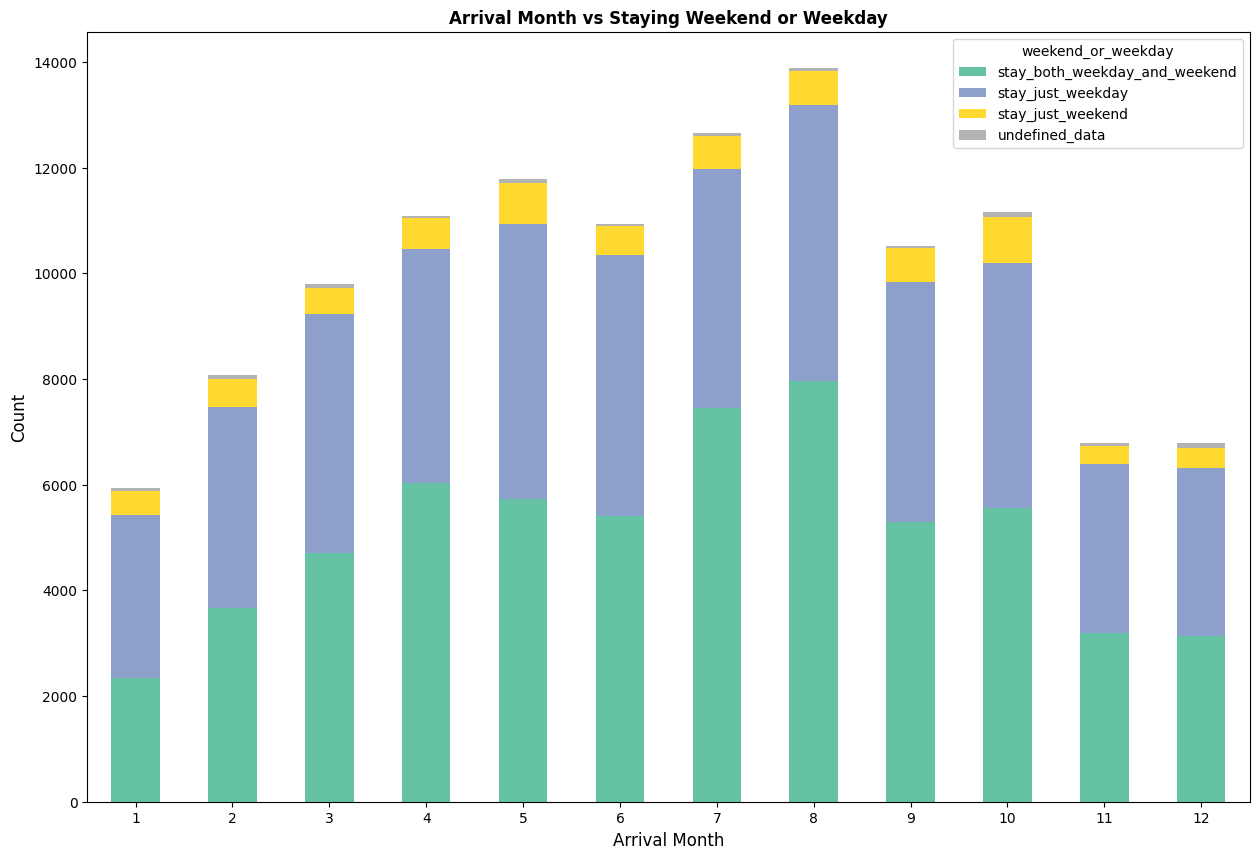

In [21]:
#`arrival_date_month` vs `weekend_or_weekday` graph

hotel_data['arrival_date_month']= hotel_data['arrival_date_month'].astype('int64')
group_data = hotel_data.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, cmap='Set2',figsize=(15,10))
plt.title('Arrival Month vs Staying Weekend or Weekday', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

### 아동 관련 변수 통합

- **기존 변수**: `children`, `babies`  
- **분석 결과**: 두 변수 간 **뚜렷한 차이가 없음**  
- **처리 방식**: 두 변수를 합쳐 **`all_children`** 이라는 단일 변수로 통합

In [22]:
# Create new feature:`all_children` with merge children and baby features

hotel_data['all_children'] = hotel_data['children'] + hotel_data['babies']
pd.crosstab(hotel_data['adults'], hotel_data['all_children'], margins=True, margins_name = 'Total').iloc[:10]

all_children,0.0,1.0,2.0,3.0,9.0,10.0,Total
adults,,,,,,,
0,180,4,205,14,0,0,403
1,22577,286,157,6,1,0,23027
2,81557,4658,3369,91,0,2,89677
3,5665,495,41,0,0,0,6201
4,59,3,0,0,0,0,62
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1
20,2,0,0,0,0,0,2


### Meal Categories
- **Bed & Breakfast(B&B)** 예약이 전체의 **약 80%**를 차지  
- 다른 식사 카테고리와 **큰 격차**를 보임

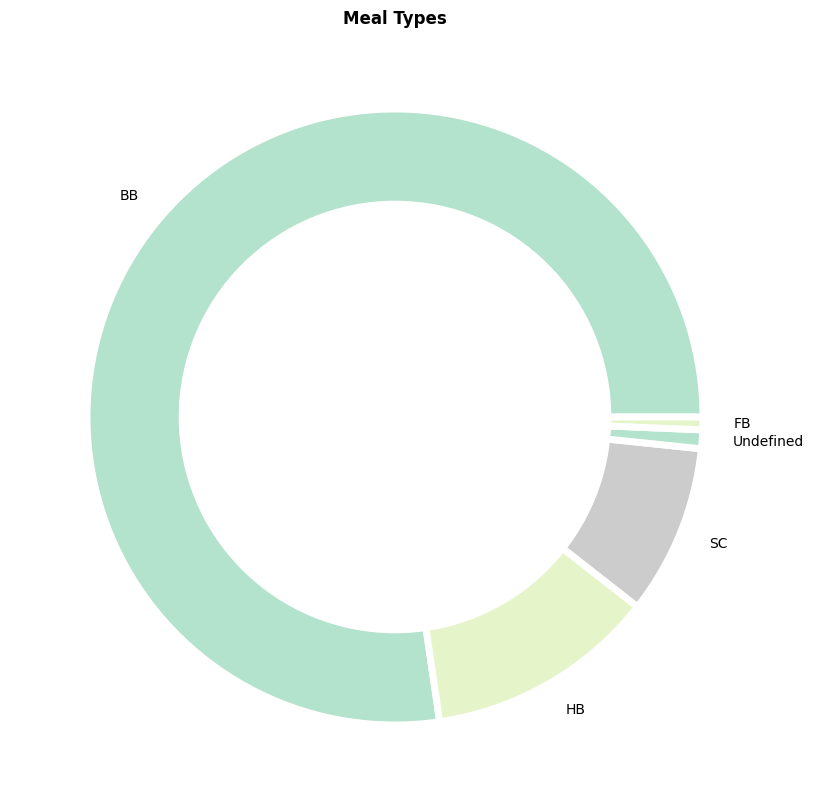

In [23]:
# `Meal` feature donut chart

meal_labels= ['BB','HB', 'SC', 'Undefined', 'FB']
size = hotel_data['meal'].value_counts()
plt.figure(figsize=(10,10))
cmap =plt.get_cmap("Pastel2")
colors = cmap(np.arange(3)*4)
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=meal_labels, colors=colors, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Meal Types', weight='bold')
plt.show()

### Meal Types by Hotel Type
- **City Hotel**: B&B 예약의 **약 67%**가 이곳에서 발생  
- **Resort Hotel**: **Full Board** 예약이 거의 모두 집중

In [24]:
# Groupby `Meal` and `Hotel` features

group_meal_data = hotel_data.groupby(['hotel','meal']).size().unstack(fill_value=0).transform(lambda x: x/x.sum())
group_meal_data.applymap('{:.2f}'.format)

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,0.67,0.06,0.44,0.99,0.00
Resort Hotel,0.33,0.94,0.56,0.01,1.00


### Booking Location
- **Portugal**에서 전체 예약의 **약 40%**가 이루어짐  
- 다른 국가 대비 **뚜렷하게 높은 비중**

Text(0, 0.5, 'Count')

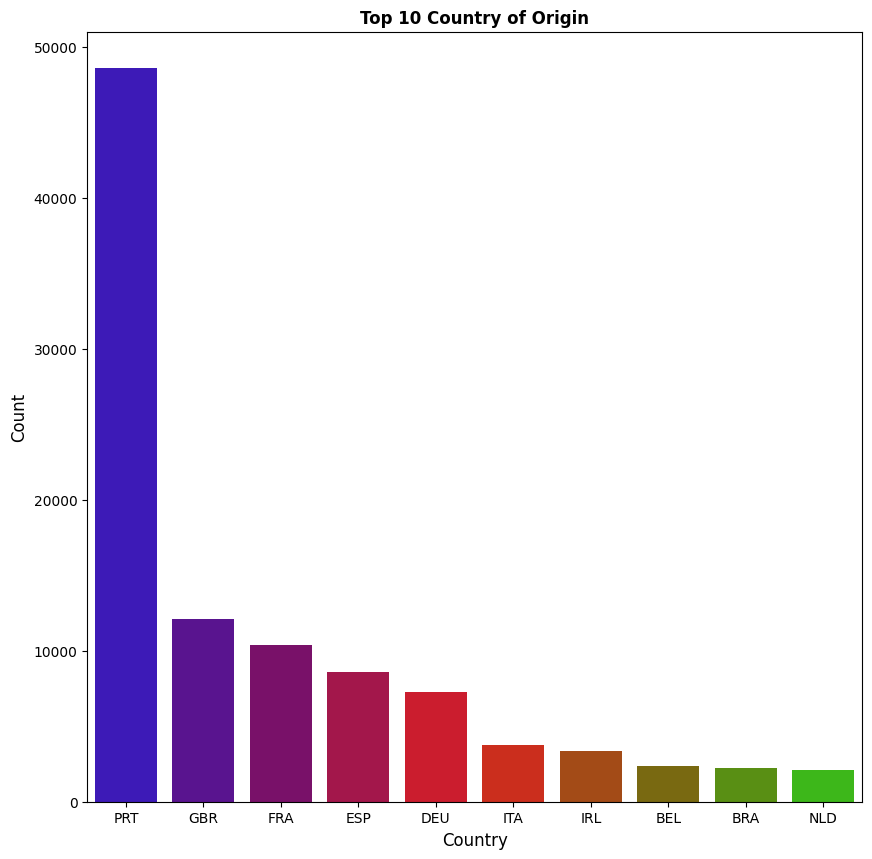

In [25]:
# Create Top 10 Country of Origin graph

plt.figure(figsize=(10,10))
sns.countplot(x='country', data=hotel_data,
              order=pd.value_counts(hotel_data['country']).iloc[:10].index, palette="brg")
plt.title('Top 10 Country of Origin', weight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

### Reservation Channels
- 최근 **온라인 호텔·항공 예약 증가 추세**  
- **예약 채널 비중**:
  - **Online Travel Agents**: **45% 이상**
  - **Offline Travel Agents**: **약 20%**
  - **직접 예약(Direct)**: **20% 미만**
- 대부분의 예약이 **스마트폰을 통해 완료**됨

Text(0, 0.5, 'Count')

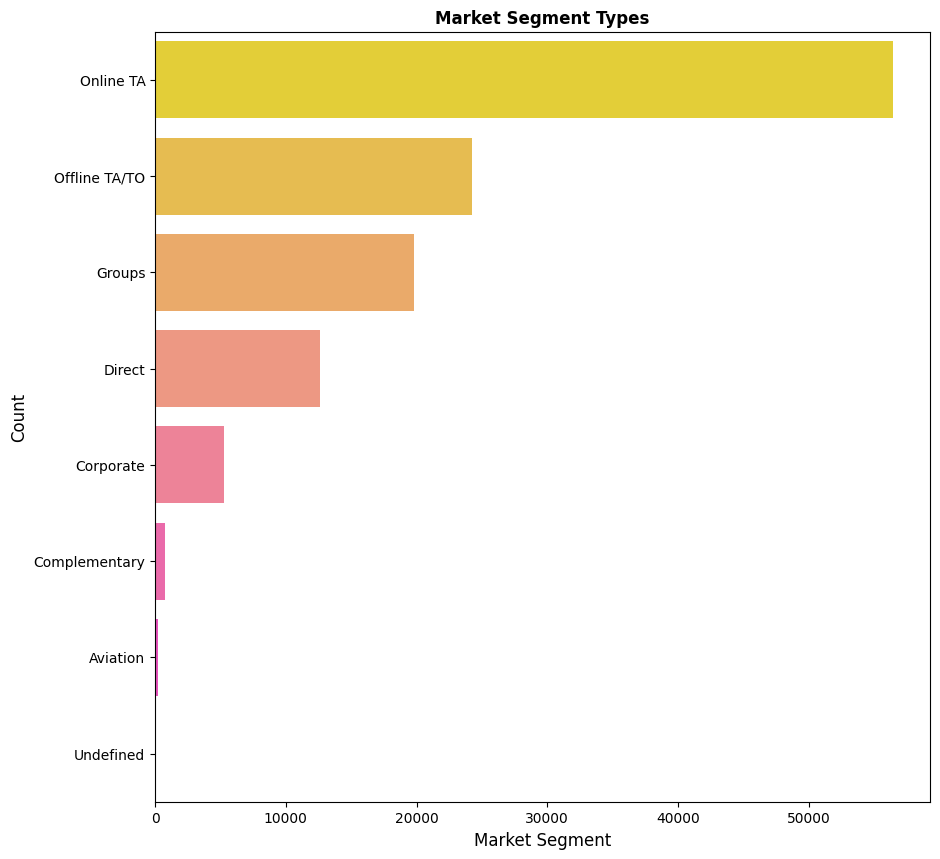

In [26]:
# `Market_segment` feature exploration

plt.figure(figsize=(10,10))
sns.countplot(hotel_data['market_segment'], palette='spring_r',
              order=pd.value_counts(hotel_data['market_segment']).index)
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

### 예약된 객실 타입 vs 실제 배정 객실 타입
- 평균 **84%**의 예약이 **원래 예약한 객실 타입을 그대로 유지**  
- 나머지 **약 16%**는 **예약된 타입과 다른 객실로 변경**  
- 각 행은 예약된 객실 타입을 나타내며, 열은 실제 배정된 객실 타입의 분포를 백분율로 표시

In [27]:
# Reserved vs Assigned room types table

pd.crosstab(index = hotel_data['reserved_room_type'],
            columns = hotel_data['assigned_room_type'],normalize='index').round(2)*100

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,86.0,1.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,10.0,88.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,91.0,6.0,2.0,0.0,1.0,0.0,0.0,0.0
F,0.0,1.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,97.0,0.0,1.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0,0.0


### ADR(평균 일일 요금) · 도착 월 · 예약 취소 관계
- **8월(August)**: 예약이 가장 많은 달이자 **ADR(Arrival Daily Rate)** 도 가장 높음  
- **7월·9월**과 같은 성수기를 제외하면,  
  - **취소된 예약**이 **취소되지 않은 예약**보다 **평균 ADR이 더 높음**  
- **높은 ADR**이 일부 예약 취소의 **원인일 가능성**을 시사

Text(0, 0.5, 'ADR')

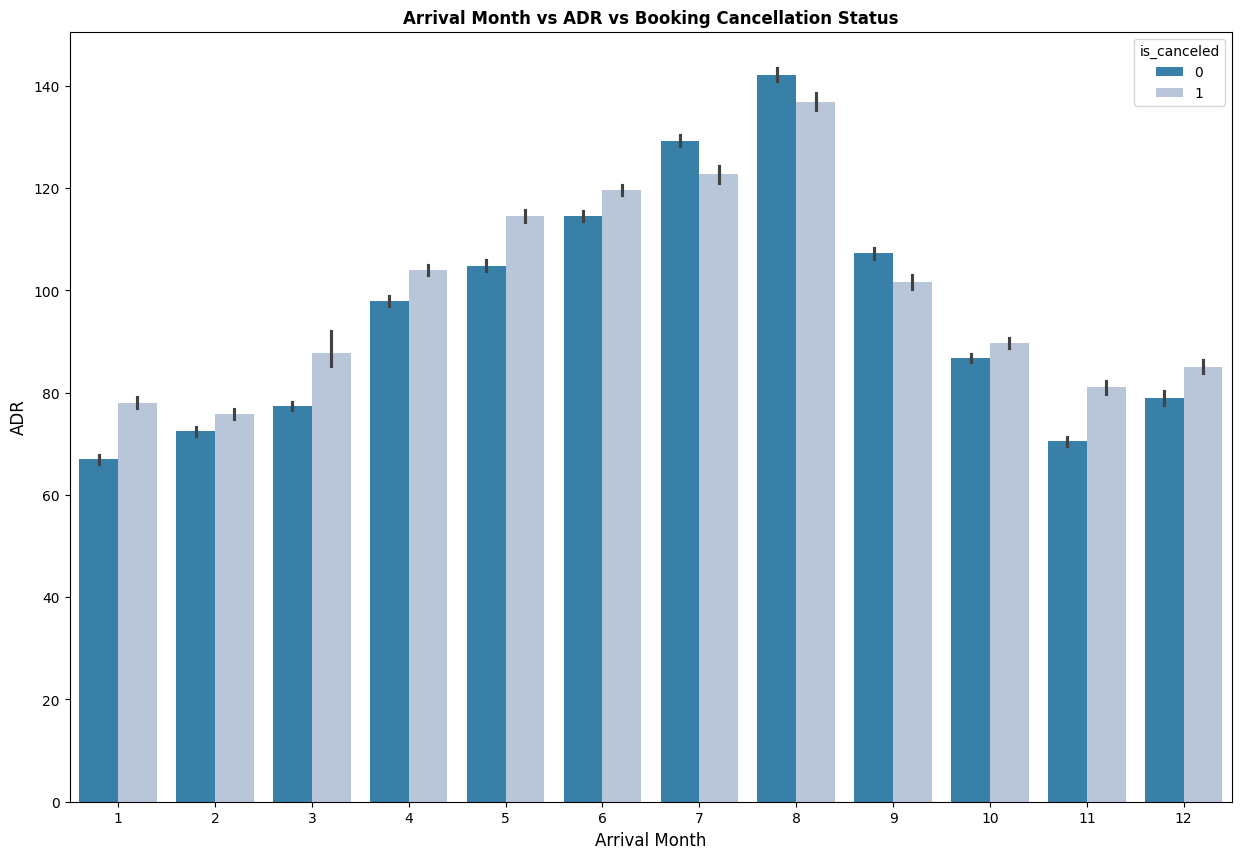

In [28]:
# `Arrival Month` vs `ADR` vs `Booking Cancellation Status`

hotel_data['adr'] = hotel_data['adr'].astype(float)
plt.figure(figsize=(15,10))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', dodge=True, palette= 'PuBu_r', data=hotel_data)
plt.title('Arrival Month vs ADR vs Booking Cancellation Status', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.ylabel('ADR', fontsize=12)

### Total Special Requests
- 전체 예약 중 **약 55%**가 **특별 요청(Special Request)이 없음**

Text(0, 0.5, 'Count')

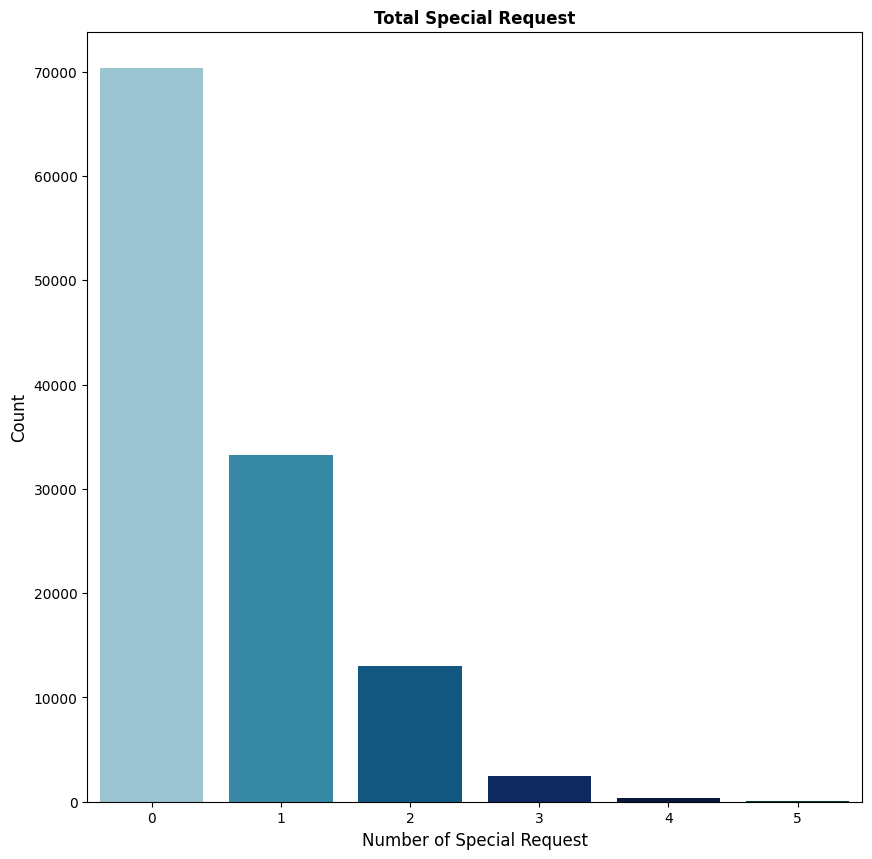

In [29]:
# `total_of_special_requests` graph

plt.figure(figsize=(10,10))
sns.countplot(x='total_of_special_requests', data=hotel_data, palette = 'ocean_r')
plt.title('Total Special Request', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

### Special Requests vs Booking Cancellation
- **특별 요청이 없는 예약**의 경우  
  - **취소율과 비취소율이 거의 50:50**로 나타남

Text(0, 0.5, 'Count')

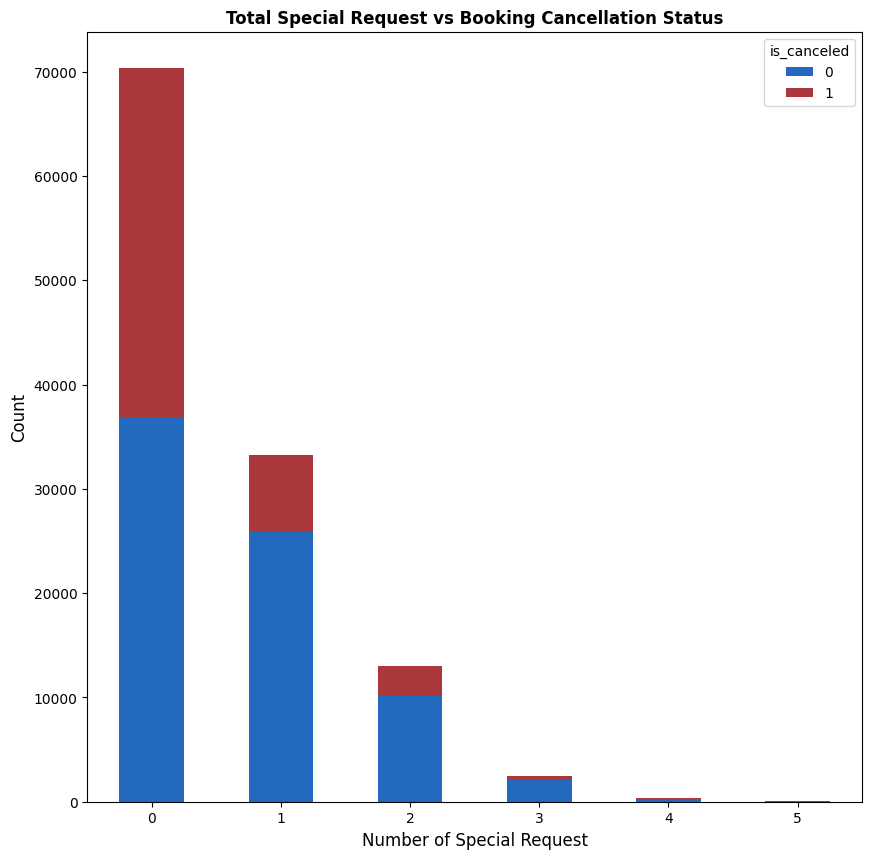

In [30]:
# Group by `total_of_special_requests` and `is_canceled` features

group_adr_request = hotel_data.groupby([ 'total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
group_adr_request.plot(kind='bar', stacked=True, cmap='vlag', figsize=(10,10))
plt.title('Total Special Request vs Booking Cancellation Status', weight='bold')
plt.xlabel('Number of Special Request', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)

## 결측치 처리
- **company**: 결측치가 **94%** → **특성 제거**  
- **children / all_children**: 결측치 **4건** → **0으로 대체**  
- **country**: 결측치 **1% 미만** → **가장 빈도가 높은 값으로 대체**  
- **agent**: 결측치 **country보다 많음** → **0으로 대체**

In [31]:
## Display sum of null data

hotel_data.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [32]:
# Fill missing data

hotel_data['children'] =  hotel_data['children'].fillna(0)
hotel_data['all_children'] =  hotel_data['all_children'].fillna(0)
hotel_data['country'] = hotel_data['country'].fillna(hotel_data['country'].mode().index[0])
hotel_data['agent']= hotel_data['agent'].fillna('0')
hotel_data=hotel_data.drop(['company'], axis =1)

In [33]:
# Change data structure

hotel_data['agent']= hotel_data['agent'].astype(int)
hotel_data['country']= hotel_data['country'].astype(str)

### 범주형 변수 인코딩
- 범주형 라벨을 **수치형으로 변환**해 머신러닝 알고리즘 적용 용이
- **country**처럼 순서가 없는 변수의 경우  
  - 일반적으로 **One-Hot Encoding** 사용 가능  
  - 카테고리 수가 많아 **계산 비용 증가 우려** → **Label Encoding**으로 대체

In [34]:
#Using Label Encoder method for categorical features

labelencoder = LabelEncoder()
hotel_data['hotel'] = labelencoder.fit_transform(hotel_data['hotel'])
hotel_data['arrival_date_month'] = labelencoder.fit_transform(hotel_data['arrival_date_month'])
hotel_data['meal'] = labelencoder.fit_transform(hotel_data['meal'])
hotel_data['country'] = labelencoder.fit_transform(hotel_data['country'])
hotel_data['market_segment']= labelencoder.fit_transform(hotel_data['market_segment'])
hotel_data['distribution_channel']=labelencoder.fit_transform(hotel_data['distribution_channel'])
hotel_data['is_repeated_guest'] = labelencoder.fit_transform(hotel_data['is_repeated_guest'])
hotel_data['reserved_room_type'] = labelencoder.fit_transform(hotel_data['reserved_room_type'])
hotel_data['assigned_room_type'] = labelencoder.fit_transform(hotel_data['assigned_room_type'])
hotel_data['deposit_type'] = labelencoder.fit_transform(hotel_data['deposit_type'])
hotel_data['agent'] = labelencoder.fit_transform(hotel_data['agent'])
hotel_data['customer_type'] = labelencoder.fit_transform(hotel_data['customer_type'])
hotel_data['reservation_status'] = labelencoder.fit_transform(hotel_data['reservation_status'])
hotel_data['weekend_or_weekday'] = labelencoder.fit_transform(hotel_data['weekend_or_weekday'])

### 범주형·수치형 데이터 분리 및 상관분석
- 범주형 데이터와 수치형 데이터를 각각 **별도 데이터프레임**으로 분리  
- **범주형**: Spearman 상관계수 사용  
- **수치형**: Pearson 상관계수 사용  
- 두 개의 상관 행렬(히트맵) 생성

In [35]:
#Create new dataframe for categorical data

hotel_data_categorical = hotel_data[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel',
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status',
                                     'weekend_or_weekday']]
hotel_data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   hotel                 119390 non-null  int64
 1   is_canceled           119390 non-null  int64
 2   arrival_date_month    119390 non-null  int64
 3   meal                  119390 non-null  int64
 4   country               119390 non-null  int64
 5   market_segment        119390 non-null  int64
 6   distribution_channel  119390 non-null  int64
 7   is_repeated_guest     119390 non-null  int64
 8   reserved_room_type    119390 non-null  int64
 9   assigned_room_type    119390 non-null  int64
 10  deposit_type          119390 non-null  int64
 11  agent                 119390 non-null  int64
 12  customer_type         119390 non-null  int64
 13  reservation_status    119390 non-null  int64
 14  weekend_or_weekday    119390 non-null  int64
dtypes: int64(15)
memory usage: 13.7 MB

In [36]:
#Create new dataframe for numerical data

hotel_data_numerical= hotel_data.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel',
                                       'is_repeated_guest', 'reserved_room_type',
                                       'assigned_room_type','deposit_type','agent',
                                       'customer_type','reservation_status',
                                       'weekend_or_weekday'], axis = 1)
hotel_data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   arrival_date_year               119390 non-null  int64  
 2   arrival_date_week_number        119390 non-null  int64  
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  float64
 8   babies                          119390 non-null  int64  
 9   previous_cancellations          119390 non-null  int64  
 10  previous_bookings_not_canceled  119390 non-null  int64  
 11  booking_changes                 119390 non-null  int64  
 12  days_in_waiting_

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

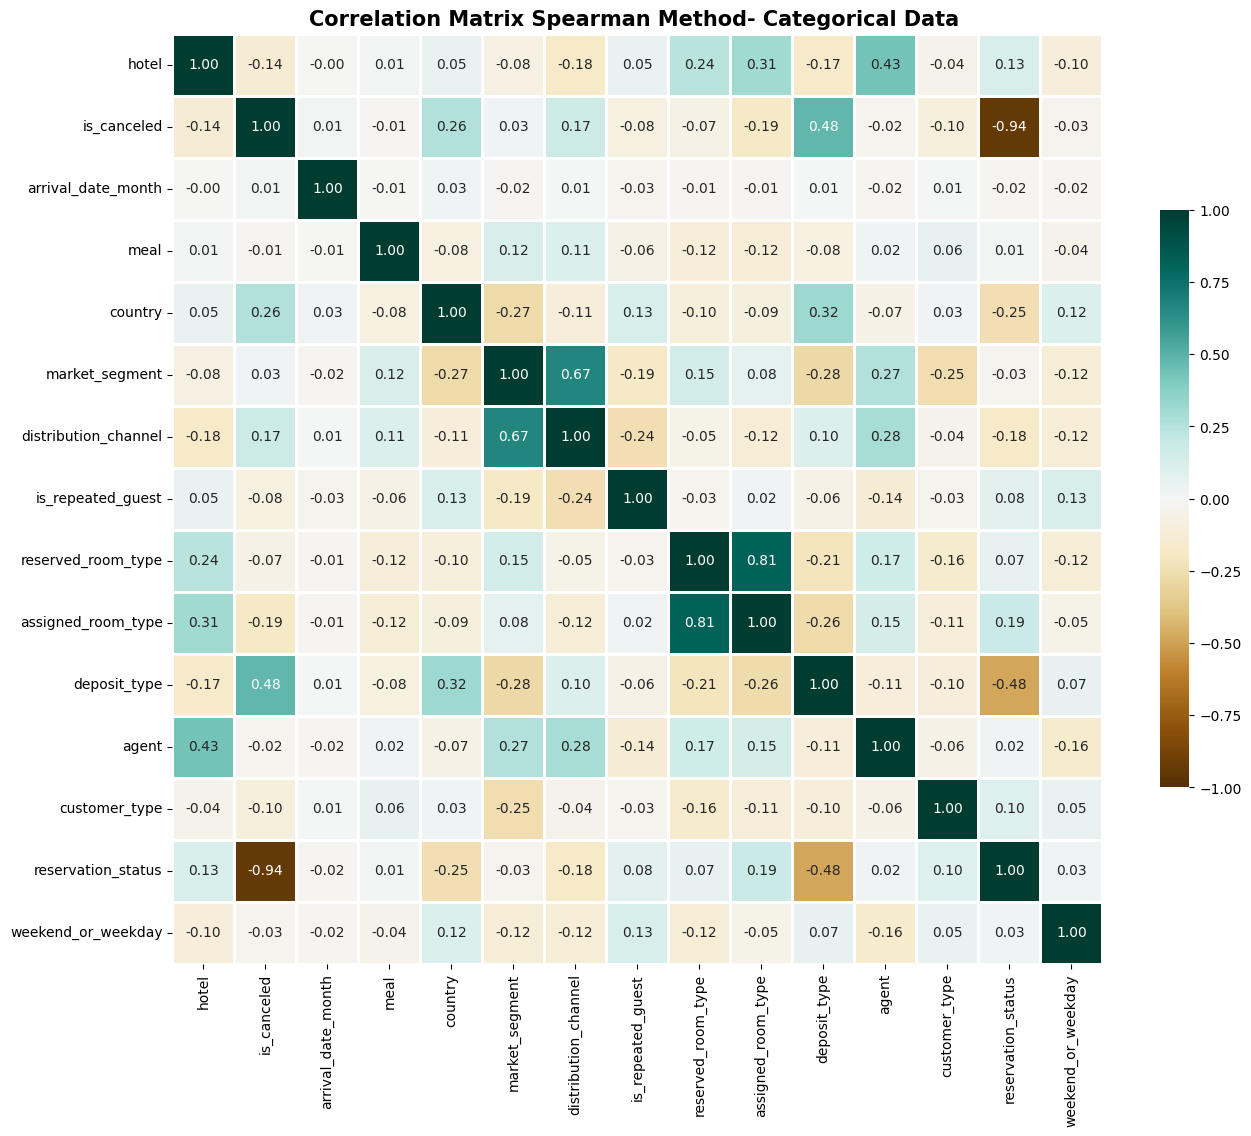

In [37]:
# Correlation Matrix with Spearman method

plt.figure(figsize=(15,15))
corr_categorical=hotel_data_categorical.corr(method='spearman')
mask_categorical = np.triu(np.ones_like(corr_categorical, dtype=np.bool))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix Pearson Method- Numerical Data ')

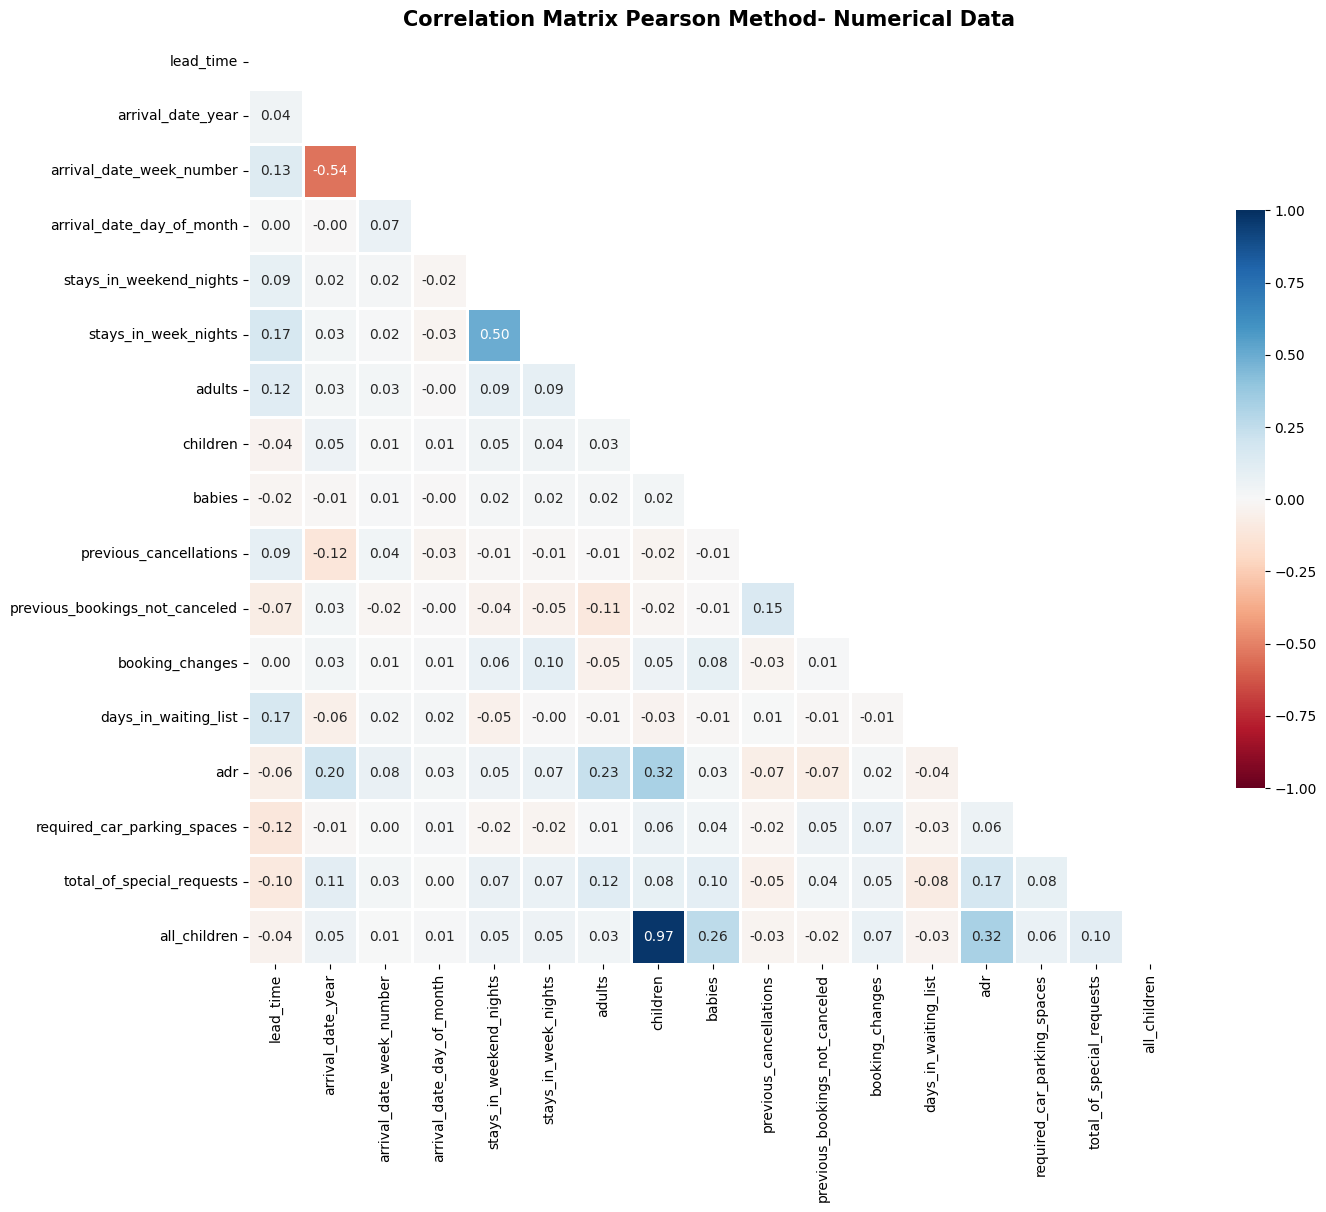

In [39]:
# Correlation Matrix with pearson method

plt.figure(figsize=(15,15))
corr_numerical=hotel_data_numerical.drop('reservation_status_date', axis=1).corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='RdBu', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title("Correlation Matrix Pearson Method- Numerical Data ",size=15, weight='bold')

In [40]:
# Finding high correlated features

corr_mask_categorical = corr_categorical.mask(mask_categorical)
corr_values_categorical = [c for c in corr_mask_categorical.columns if any (corr_mask_categorical[c] > 0.90)]
corr_mask_numerical = corr_numerical.mask(mask_numerical)
corr_values_numerical = [c for c in corr_mask_numerical.columns if any (corr_mask_numerical[c] > 0.90)]
print(corr_values_categorical, corr_values_numerical)

[] ['children']


## 상관분석 결과 및 특성 제거
- **reservation_status**: `is_canceled`와 **높은 음의 상관** → 예측 오류·과적합 우려 → **제거**  
- **children**: `all_children`에 이미 포함 → **제거**  
- **reservation_status_date**: 날짜 타입 변환 불가 → **제거**

In [41]:
# `reservation_status` vs `is_canceled` table

pd.crosstab(columns = hotel_data['reservation_status'], index = hotel_data['is_canceled'],
           margins=True, margins_name = 'Total')

reservation_status,0,1,2,Total
is_canceled,,,,
0,0,75166,0,75166
1,43017,0,1207,44224
Total,43017,75166,1207,119390


In [42]:
#Dropping some features from data

hotel_data = hotel_data.drop(['reservation_status', 'children', 'reservation_status_date'], axis=1)

In [43]:
#Copying data to used next parts

hotel_data_model = hotel_data

### 하이퍼파라미터 튜닝 & 특징 중요도
- **Grid Search Algorithm**을 활용해 **트리 기반 ML 알고리즘의 최적 하이퍼파라미터 탐색**  
- **Extreme Gradient Boosting(XGBoost)** 기반으로 **Permutation Feature Importance** 수행  
  - 정확도(accuracy)를 기준으로 **각 특성이 예측에 기여하는 정도**를 평가  
  - 중요도가 낮은 불필요한 특성 식별 및 데이터셋 개선에 활용

In [44]:
# Seperate target variable

hotel_data_tunning = hotel_data
y = hotel_data_tunning.iloc[:,1]
X = pd.concat([hotel_data_tunning.iloc[:,0],hotel_data_tunning.iloc[:,2:30]], axis=1)

In [45]:
## Finding parameters for XGBoost model

# model = XGBClassifier()
# parameters = {
# 'n_estimators' : [100,250,500],
# 'learning_rate' : [0.01, 0.1],
# 'subsample' :[0.5, 1.0],
# 'max_depth' : [3,5,7],
# 'criterion' : ['giny','entropy'],
# 'objective':['binary:logistic'],
# }

# grid_search = GridSearchCV(estimator=model, param_grid=parameters,
#                           cv=5, scoring='f1', verbose=True, n_jobs=-1)
# grid_search.fit(X, y)
# print(grid_search.best_score_)
# print(grid_search.best_params_)

In [46]:
## Finding parameters for RF model

# model_rfc_gs = RandomForestClassifier()
# parameters_rfc = {
# 'n_estimators' : [100,200,500],
# 'min_samples_split' : [2,4,6,8],
# 'min_samples_leaf': [1,2,4,6]
# }

# grid_search_rfc = GridSearchCV(estimator=model_rfc_gs, param_grid=parameters_rfc,
#                           cv=5, scoring='f1', verbose=True, n_jobs=-1)
# grid_search_rfc.fit(X, y)
# grid_search_rfc.best_params_

In [47]:
## Finding parameters for Extra Tree Classifier

# model_etc_gs = ExtraTreesClassifier()
# parameters_etc = {
# 'n_estimators' : [100,250,500],
# 'min_samples_split' : [2,4,6,8],
# 'min_samples_leaf': [1,3,5,7]
# }

# grid_search_etc = GridSearchCV(estimator=model_etc_gs, param_grid=parameters_etc,
#                           cv=5, scoring='f1', verbose=True, n_jobs=-1)
# grid_search_etc.fit(X, y)
# grid_search_etc.best_params_

In [48]:
## Finding parameters for Decision Tree

# model_dtc_gs = DecisionTreeClassifier()
# parameters_dtc = {
# 'criterion' : ['gini', 'entropy'],
# 'min_samples_split' : [2,4,6,8],
# 'min_samples_leaf': [1,2,3,4,5],
# 'max_features' : ['auto', 'sqrt']
# }

# grid_search_dtc = GridSearchCV(estimator=model_dtc_gs, param_grid=parameters_dtc,
#                           cv=5, scoring='f1', verbose=True, n_jobs =-1)
# grid_search_dtc.fit(X, y)
# grid_search_dtc.best_params_

In [49]:
# Permutation Importance graph with XGB Classifier algorithm.

params = {
    'criterion': 'giny',
    'learning_rate': 0.01,
    'max_depth': 5,
    'n_estimators': 100,
    'objective': 'binary:logistic',
}
model = XGBClassifier(parameters=params)
# fit the model
model.fit(X, y)
# perform permutation importance
result = permutation_importance(model, X, y, scoring='accuracy', n_repeats = 5, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:48:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "parameters" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [50]:
# Feature scores table

for i,v in enumerate(sorted_idx):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 9.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 6.00000
Feature: 3, Score: 28.00000
Feature: 4, Score: 27.00000
Feature: 5, Score: 22.00000
Feature: 6, Score: 14.00000
Feature: 7, Score: 13.00000
Feature: 8, Score: 8.00000
Feature: 9, Score: 3.00000
Feature: 10, Score: 7.00000
Feature: 11, Score: 10.00000
Feature: 12, Score: 5.00000
Feature: 13, Score: 16.00000
Feature: 14, Score: 19.00000
Feature: 15, Score: 24.00000
Feature: 16, Score: 4.00000
Feature: 17, Score: 25.00000
Feature: 18, Score: 23.00000
Feature: 19, Score: 2.00000
Feature: 20, Score: 15.00000
Feature: 21, Score: 12.00000
Feature: 22, Score: 17.00000
Feature: 23, Score: 18.00000
Feature: 24, Score: 26.00000
Feature: 25, Score: 1.00000
Feature: 26, Score: 21.00000
Feature: 27, Score: 20.00000
Feature: 28, Score: 11.00000


/tmp/ipython-input-3090481930.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(result.importances[sorted_idx].T,


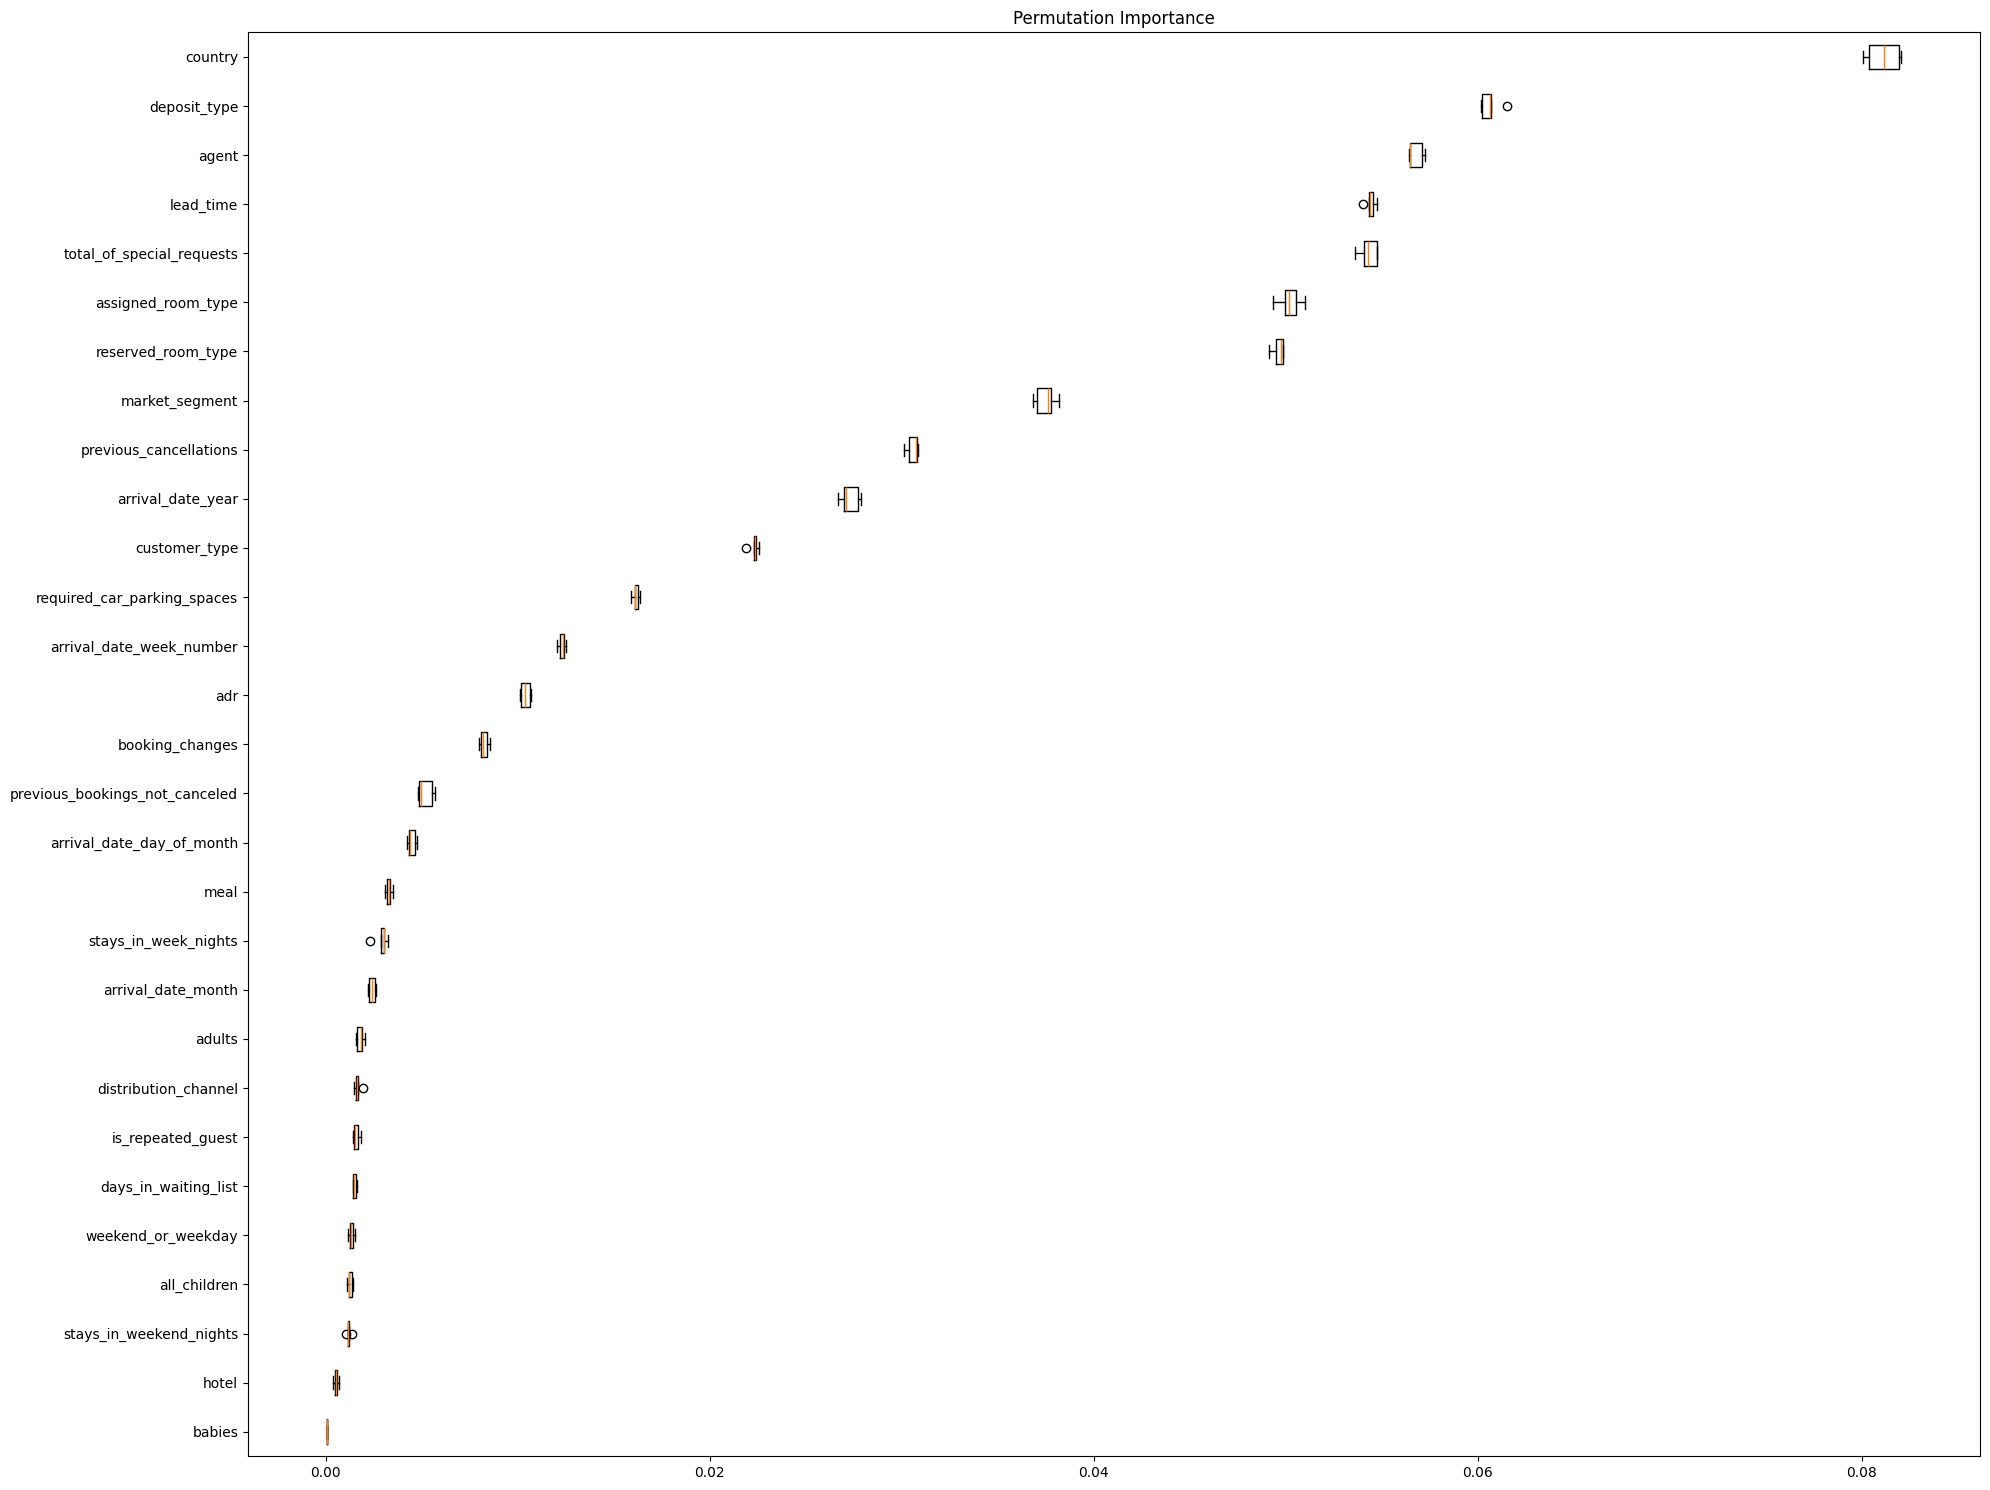

In [51]:
#Permutation Importance graph

fig, ax = plt.subplots(figsize=(20,15))

ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

### Feature Importance
- 29개 특성 중 **`babies`** 변수가 **예측에 거의 기여하지 않음** → **제거**

In [52]:
# Drop `baby` feature from data

hotel_data_model = hotel_data_model.drop(['babies'], axis=1)

## 모델 빌딩
- 사용된 알고리즘:
  - **Decision Tree** (단일 트리)
  - **Random Forest**, **Extra Trees Classifier** (Bagging 기반)
  - **Extreme Gradient Boosting (XGBoost)** (Boosting 기반)

In [54]:
# Seperate target variable for model building

y_model = hotel_data_model.iloc[:,1]
X_model = pd.concat([hotel_data_tunning.iloc[:,0],hotel_data_tunning.iloc[:,2:30]], axis=1)
y_model.describe()

,is_canceled
count,119390.000000
mean,0.370416
std,0.482918
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [55]:
# Split to train and test with 70-30 ratio

X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.3, random_state=42, stratify = y)

In [56]:
# Implement standart scaler method

standardScalerX = StandardScaler()
X_train = standardScalerX.fit_transform(X_train)
X_test = standardScalerX.fit_transform(X_test)

In [57]:
# Stratified K-Fold Cross Validation Method

kfold_cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in kfold_cv.split(X_model,y_model):
    X_train, X_test = X_model.iloc[train_index], X_model.iloc[test_index]
    y_train, y_test = y_model.iloc[train_index], y_model.iloc[test_index]

In [59]:
# Decision Tree Model Building

dtc_model = DecisionTreeClassifier(criterion= 'gini', min_samples_split=8,
                                  min_samples_leaf = 4)
# fit the model
dtc_model.fit(X_train, y_train)

#Predict Model
predict_dtc = dtc_model.predict(X_test)

In [60]:
# Random Forest Model Building

rf_model = RandomForestClassifier(min_samples_leaf = 6, min_samples_split=6,
                                  n_estimators = 100)

# fit the model
estimator= rf_model.fit(X_train, y_train)
#Predict Model
predict_rf = rf_model.predict(X_test)

In [61]:
# Extra Treees Classsifier Model Building

etc_model = ExtraTreesClassifier(min_samples_leaf = 7, min_samples_split=2,
                                  n_estimators = 100)
# fit the model
etc_model.fit(X_train, y_train)

#Predict Model
predict_etc = etc_model.predict(X_test)

In [62]:
# Extreme Gradient Boosting Model Building

xgb_model = XGBClassifier(criterion = 'giny', learning_rate = 0.01, max_depth = 5, n_estimators = 100,
                          objective ='binary:logistic', subsample = 1.0)
# fit the model
xgb_model.fit(X_train, y_train)
#Predict Model
predict_xgb = xgb_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:55:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "criterion" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## 데이터 전처리 및 학습 설정
- **데이터 분할**: Train 70% / Test 30%  
- **정규화**: `Standard Scaler` 사용  
- **교차 검증**: `Stratified K-Fold Cross Validation` 적용  
  - 데이터 분포를 유지하면서 train/test 세트를 분할  
  - **과적합 방지**를 위한 핵심 기법

In [63]:
# Classification Reports

print("RF", classification_report(y_test, predict_rf))
print("DTC",classification_report(y_test, predict_dtc))
print("ETC", classification_report(y_test, predict_etc))
print("XGB", classification_report(y_test, predict_xgb))

RF               precision    recall  f1-score   support

           0       0.88      0.94      0.91     15033
           1       0.89      0.79      0.83      8845

    accuracy                           0.88     23878
   macro avg       0.88      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878

DTC               precision    recall  f1-score   support

           0       0.87      0.90      0.88     15033
           1       0.81      0.78      0.80      8845

    accuracy                           0.85     23878
   macro avg       0.84      0.84      0.84     23878
weighted avg       0.85      0.85      0.85     23878

ETC               precision    recall  f1-score   support

           0       0.85      0.95      0.90     15033
           1       0.90      0.72      0.80      8845

    accuracy                           0.87     23878
   macro avg       0.88      0.84      0.85     23878
weighted avg       0.87      0.87      0.86     23878

XGB     

Text(792.3131313131312, 0.5, 'Actual Labels')

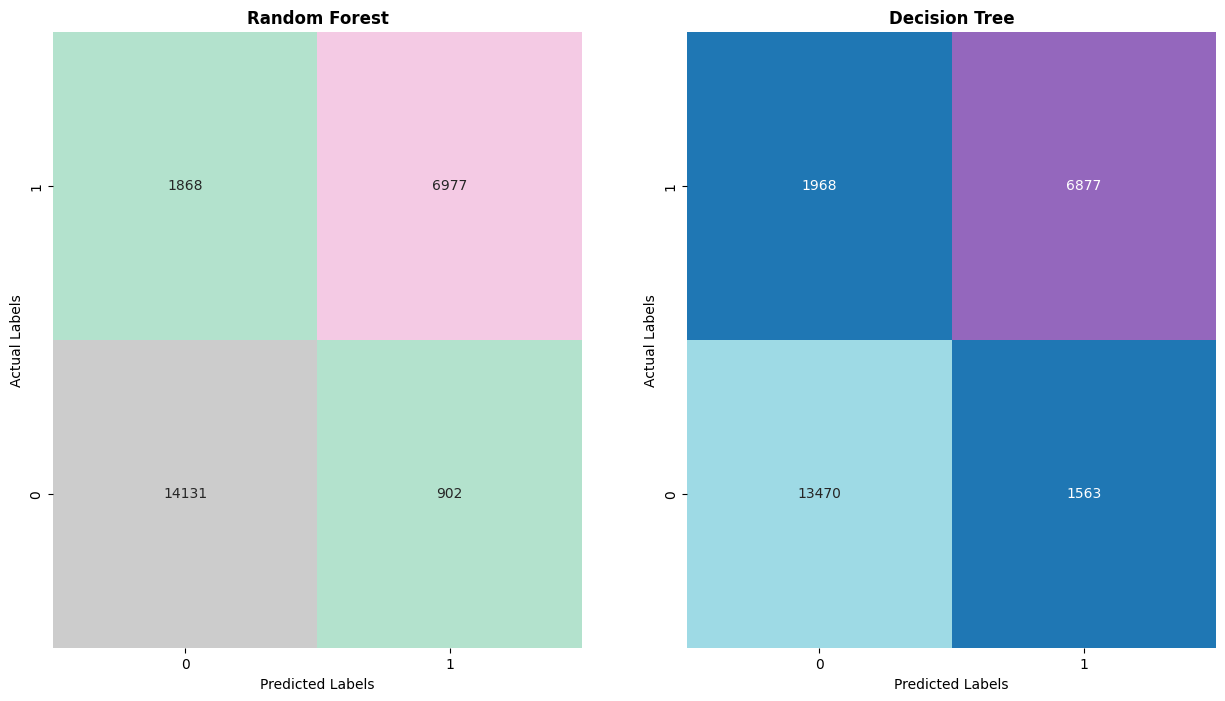

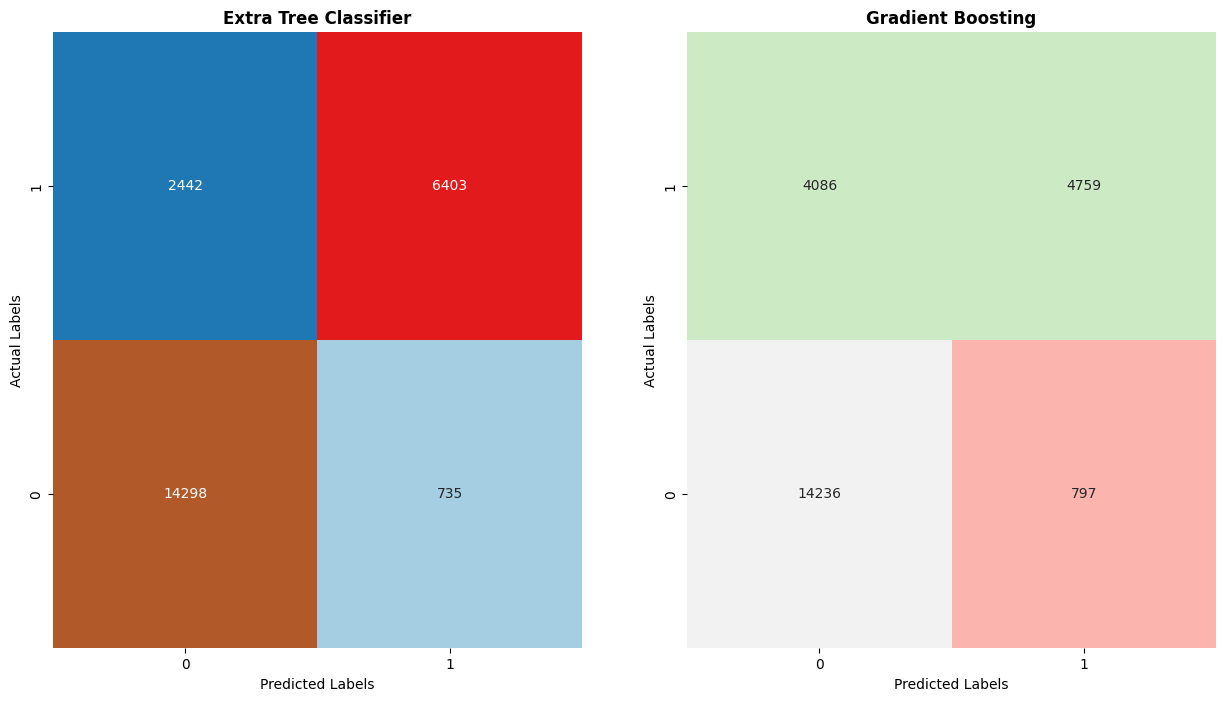

In [64]:
# Confusion Matrix

DTC_matrix = confusion_matrix(y_test, predict_dtc)
RF_matrix = confusion_matrix(y_test, predict_rf)
ETC_matrix = confusion_matrix(y_test, predict_etc)
XGB_matrix = confusion_matrix(y_test, predict_xgb)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(RF_matrix,annot=True, fmt="d", cbar=False, cmap="Pastel2",  ax = ax[0]).set_ylim([0,2])
ax[0].set_title("Random Forest", weight='bold')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('Actual Labels')
sns.heatmap(DTC_matrix,annot=True, fmt="d" ,cbar=False, cmap="tab20", ax = ax[1]).set_ylim([0,2])
ax[1].set_title("Decision Tree", weight='bold')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('Actual Labels')

fig, axe = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(ETC_matrix,annot=True, fmt="d", cbar=False, cmap="Paired", ax = axe[0]).set_ylim([0,2])
axe[0].set_title("Extra Tree Classifier", weight='bold')
axe[0].set_xlabel('Predicted Labels')
axe[0].set_ylabel('Actual Labels')
sns.heatmap(XGB_matrix,annot=True, fmt="d", cbar=False, cmap="Pastel1", ax = axe[1]).set_ylim([0,2])
axe[1].set_title("Gradient Boosting", weight='bold')
axe[1].set_xlabel('Predicted Labels')
axe[1].set_ylabel('Actual Labels')